In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.preprocessing.text import Tokenizer
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
films = pd.read_csv('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\wiki_movie_plots_deduped.csv')
films = films[['Plot', 'Genre']]
films.drop(films[films['Genre'] == 'unknown'].index, inplace = True)
films.reset_index(drop = True, inplace = True)
mostFrequentGenres = films['Genre'].value_counts()[:10]
genresList = mostFrequentGenres.index.tolist()
print(mostFrequentGenres.sort_values(ascending = False))

drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64


In [3]:
filmsFrequent = films[films['Genre'].isin(genresList)]
filmsDrama = filmsFrequent[filmsFrequent['Genre'] == 'drama'].sample(5000, replace = True)
filmsComedy = filmsFrequent[filmsFrequent['Genre'] == 'comedy'].sample(5000, replace = True)
filmsHorror = filmsFrequent[filmsFrequent['Genre'] == 'horror'].sample(5000, replace = True)
filmsAction = filmsFrequent[filmsFrequent['Genre'] == 'action'].sample(5000, replace = True)
filmsThriller = filmsFrequent[filmsFrequent['Genre'] == 'thriller'].sample(5000, replace = True)
filmsRomance = filmsFrequent[filmsFrequent['Genre'] == 'romance'].sample(5000, replace = True)
filmsWestern = filmsFrequent[filmsFrequent['Genre'] == 'western'].sample(5000, replace = True)
filmsCrime = filmsFrequent[filmsFrequent['Genre'] == 'crime'].sample(5000, replace = True)
filmsAdventure = filmsFrequent[filmsFrequent['Genre'] == 'adventure'].sample(5000, replace = True)
filmsMusical = filmsFrequent[filmsFrequent['Genre'] == 'musical'].sample(5000, replace = True)
filmsOver = pd.concat([filmsDrama, filmsComedy, filmsHorror, filmsAction, filmsThriller, filmsRomance, filmsWestern,
                       filmsCrime, filmsAdventure, filmsMusical])
filmsOver = filmsOver.sample(frac = 1).reset_index(drop = True)
print(filmsOver['Genre'].value_counts().sort_values(ascending = False))
X = filmsOver['Plot'].values
y = filmsOver['Genre'].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)

horror       5000
crime        5000
thriller     5000
adventure    5000
western      5000
action       5000
romance      5000
musical      5000
comedy       5000
drama        5000
Name: Genre, dtype: int64


In [4]:
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(XTrain)

In [5]:
XTrain = tokenizer.texts_to_sequences(XTrain)
XTest = tokenizer.texts_to_sequences(XTest)

In [6]:
from keras.preprocessing.sequence import pad_sequences

XTrain = pad_sequences(XTrain, padding = 'post', maxlen = 500)
XTest = pad_sequences(XTest, padding = 'post', maxlen = 500)
print(XTrain.shape, XTest.shape, yTrain.shape, yTest.shape)

(35000, 500) (15000, 500) (35000,) (15000,)


In [7]:
def createEmbMatrix(filePath, wordIndex, embDim):
    vocabSize = len(wordIndex) + 1
    embMatrix = np.zeros((vocabSize, embDim))
    with open(filePath, encoding = 'utf8') as f:
        for line in f:
            word, *vector = line.split()
            if word in wordIndex:
                idx = wordIndex[word]
                embMatrix[idx] = np.array(vector, dtype = np.float32)[:embDim]
    return embMatrix

In [8]:
embMatrix = createEmbMatrix('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\glove.6B.50d.txt', tokenizer.word_index, 50)

In [9]:
vocabSize = len(tokenizer.word_index) + 1
vocabSize

89019

In [10]:
print(np.count_nonzero(np.count_nonzero(embMatrix, axis = 1))/len(tokenizer.word_index) + 1)

1.6868610842750904


In [11]:
model1 = Sequential()
model1.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = True))
model1.add(layers.GlobalMaxPool1D())
model1.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation = 'softmax'))
model1.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history1 = model1.fit(XTrain, yTrain, epochs = 200, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/200
350/350 [==============================] - 27s 73ms/step - loss: 2.4864 - acc: 0.1021 - val_loss: 2.4176 - val_acc: 0.1325
Epoch 2/200
350/350 [==============================] - 23s 65ms/step - loss: 2.4147 - acc: 0.1197 - val_loss: 2.3995 - val_acc: 0.1383
Epoch 3/200
350/350 [==============================] - 23s 65ms/step - loss: 2.3980 - acc: 0.1215 - val_loss: 2.3829 - val_acc: 0.1431
Epoch 4/200
350/350 [==============================] - 23s 65ms/step - loss: 2.3823 - acc: 0.1194 - val_loss: 2.3698 - val_acc: 0.1546
Epoch 5/200
350/350 [==============================] - 23s 65ms/step - loss: 2.3684 - acc: 0.1244 - val_loss: 2.3549 - val_acc: 0.1430
Epoch 6/200
350/350 [==============================] - 22s 64ms/step - loss: 2.3565 - acc: 0.1277 - val_loss: 2.3430 - val_acc: 0.1583
Epoch 7/200
350/350 [==============================] - 8s 23ms/step - loss: 2.3436 - acc: 0.1323 - val_loss: 2.3321 - val_acc: 0.1603
Epoch 8/200
350/350 [==============================] - 6

Epoch 62/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0610 - acc: 0.2322 - val_loss: 1.9597 - val_acc: 0.3781
Epoch 63/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0631 - acc: 0.2326 - val_loss: 1.9532 - val_acc: 0.3722
Epoch 64/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0595 - acc: 0.2332 - val_loss: 1.9423 - val_acc: 0.3775
Epoch 65/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0529 - acc: 0.2380 - val_loss: 1.9599 - val_acc: 0.3776
Epoch 66/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0446 - acc: 0.2396 - val_loss: 1.9549 - val_acc: 0.3760
Epoch 67/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0529 - acc: 0.2378 - val_loss: 1.9368 - val_acc: 0.3823
Epoch 68/200
350/350 [==============================] - 8s 23ms/step - loss: 2.0546 - acc: 0.2354 - val_loss: 1.9382 - val_acc: 0.3794
Epoch 69/200
350/350 [==============================] -

350/350 [==============================] - 8s 23ms/step - loss: 1.9711 - acc: 0.2732 - val_loss: 1.8263 - val_acc: 0.4161
Epoch 123/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9669 - acc: 0.2749 - val_loss: 1.8242 - val_acc: 0.4189
Epoch 124/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9783 - acc: 0.2728 - val_loss: 1.8331 - val_acc: 0.4172
Epoch 125/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9712 - acc: 0.2700 - val_loss: 1.8390 - val_acc: 0.3995
Epoch 126/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9723 - acc: 0.2708 - val_loss: 1.8113 - val_acc: 0.4241
Epoch 127/200
350/350 [==============================] - 8s 24ms/step - loss: 1.9600 - acc: 0.2756 - val_loss: 1.8350 - val_acc: 0.4071
Epoch 128/200
350/350 [==============================] - 8s 24ms/step - loss: 1.9657 - acc: 0.2725 - val_loss: 1.8100 - val_acc: 0.4168
Epoch 129/200
350/350 [==============================] - 8s 23

350/350 [==============================] - 8s 23ms/step - loss: 1.9318 - acc: 0.2837 - val_loss: 1.7625 - val_acc: 0.4356
Epoch 183/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9387 - acc: 0.2799 - val_loss: 1.7451 - val_acc: 0.4335
Epoch 184/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9305 - acc: 0.2807 - val_loss: 1.7534 - val_acc: 0.4279
Epoch 185/200
350/350 [==============================] - 8s 24ms/step - loss: 1.9359 - acc: 0.2809 - val_loss: 1.8214 - val_acc: 0.4007
Epoch 186/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9278 - acc: 0.2844 - val_loss: 1.7721 - val_acc: 0.4345
Epoch 187/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9383 - acc: 0.2757 - val_loss: 1.7627 - val_acc: 0.4303
Epoch 188/200
350/350 [==============================] - 8s 23ms/step - loss: 1.9347 - acc: 0.2827 - val_loss: 1.7758 - val_acc: 0.4275
Epoch 189/200
350/350 [==============================] - 8s 23

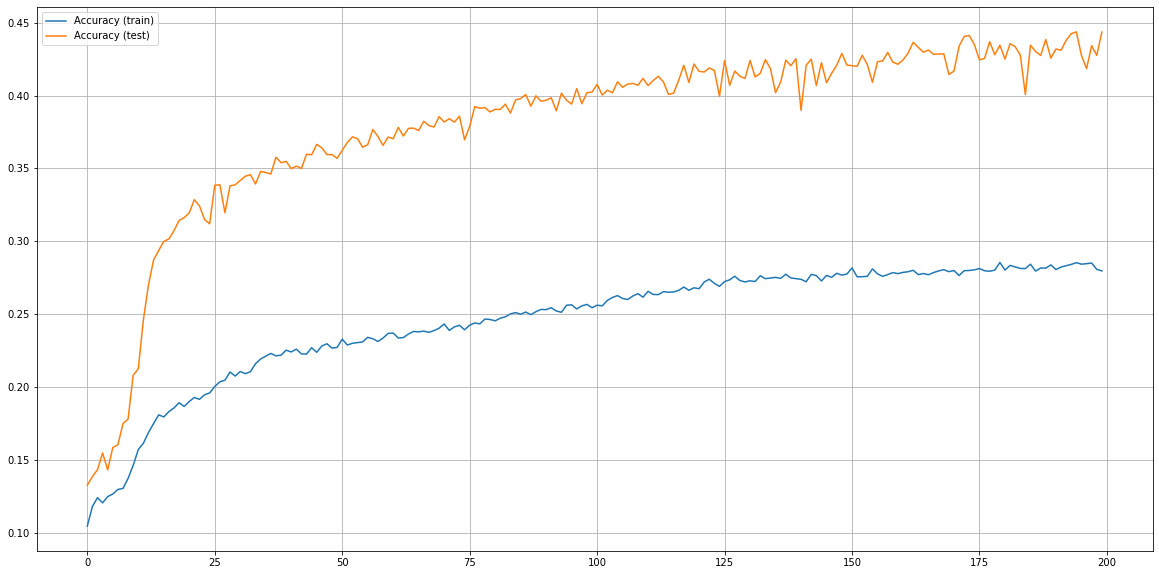

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize = [20, 10])
plt.plot(history1.history['acc'], label = 'Accuracy (train)')
plt.plot(history1.history['val_acc'], label = 'Accuracy (test)')
plt.grid()
plt.legend()
plt.show()

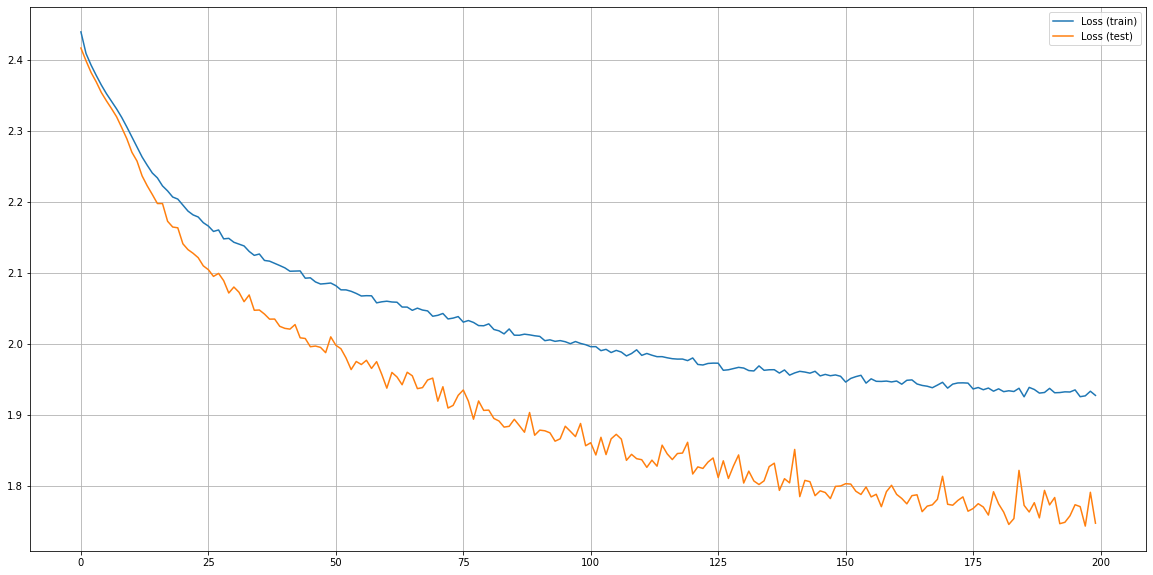

In [13]:
plt.figure(figsize = [20, 10])
plt.plot(history1.history['loss'], label = 'Loss (train)')
plt.plot(history1.history['val_loss'], label = 'Loss (test)')
plt.grid()
plt.legend()
plt.show()

In [14]:
model1.save('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\glove_1.h5')

In [15]:
model2 = Sequential()
model2.add(layers.Embedding(vocabSize, 50, weights = [embMatrix], input_length = 500, trainable = False))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(8, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation = 'softmax'))
model2.compile(optimizer = optimizers.SGD(lr = 0.01), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
history2 = model2.fit(XTrain, yTrain, epochs = 200, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4795 - acc: 0.0982 - val_loss: 2.4241 - val_acc: 0.1057
Epoch 2/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4203 - acc: 0.1047 - val_loss: 2.4079 - val_acc: 0.1033
Epoch 3/200
350/350 [==============================] - 2s 5ms/step - loss: 2.4046 - acc: 0.1006 - val_loss: 2.3941 - val_acc: 0.1039
Epoch 4/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3912 - acc: 0.1002 - val_loss: 2.3821 - val_acc: 0.1040
Epoch 5/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3795 - acc: 0.0989 - val_loss: 2.3715 - val_acc: 0.1033
Epoch 6/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3694 - acc: 0.1028 - val_loss: 2.3624 - val_acc: 0.1009
Epoch 7/200
350/350 [==============================] - 2s 5ms/step - loss: 2.3604 - acc: 0.1032 - val_loss: 2.3543 - val_acc: 0.1055
Epoch 8/200
350/350 [==============================] - 2s 5ms/step - 

350/350 [==============================] - 2s 5ms/step - loss: 2.2030 - acc: 0.1905 - val_loss: 2.1801 - val_acc: 0.2390
Epoch 63/200
350/350 [==============================] - 2s 5ms/step - loss: 2.2018 - acc: 0.1892 - val_loss: 2.1521 - val_acc: 0.2614
Epoch 64/200
350/350 [==============================] - 2s 5ms/step - loss: 2.2045 - acc: 0.1900 - val_loss: 2.1612 - val_acc: 0.2598
Epoch 65/200
350/350 [==============================] - 2s 5ms/step - loss: 2.1997 - acc: 0.1900 - val_loss: 2.1519 - val_acc: 0.2590
Epoch 66/200
350/350 [==============================] - 2s 5ms/step - loss: 2.2008 - acc: 0.1922 - val_loss: 2.1504 - val_acc: 0.2673
Epoch 67/200
350/350 [==============================] - 2s 5ms/step - loss: 2.1971 - acc: 0.1909 - val_loss: 2.1494 - val_acc: 0.2736
Epoch 68/200
350/350 [==============================] - 2s 5ms/step - loss: 2.2020 - acc: 0.1889 - val_loss: 2.1363 - val_acc: 0.2773
Epoch 69/200
350/350 [==============================] - 2s 5ms/step - loss:

350/350 [==============================] - 2s 7ms/step - loss: 2.1680 - acc: 0.2147 - val_loss: 2.0861 - val_acc: 0.3080
Epoch 124/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1655 - acc: 0.2147 - val_loss: 2.0907 - val_acc: 0.2854
Epoch 125/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1705 - acc: 0.2131 - val_loss: 2.0931 - val_acc: 0.3125
Epoch 126/200
350/350 [==============================] - 3s 7ms/step - loss: 2.1606 - acc: 0.2193 - val_loss: 2.0827 - val_acc: 0.3058
Epoch 127/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1654 - acc: 0.2144 - val_loss: 2.0824 - val_acc: 0.3105
Epoch 128/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1655 - acc: 0.2171 - val_loss: 2.1010 - val_acc: 0.2913
Epoch 129/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1714 - acc: 0.2130 - val_loss: 2.0855 - val_acc: 0.3117
Epoch 130/200
350/350 [==============================] - 2s 7ms/step 

Epoch 184/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1587 - acc: 0.2169 - val_loss: 2.0744 - val_acc: 0.2973
Epoch 185/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1596 - acc: 0.2183 - val_loss: 2.1491 - val_acc: 0.2403
Epoch 186/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1629 - acc: 0.2133 - val_loss: 2.0775 - val_acc: 0.3094
Epoch 187/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1617 - acc: 0.2160 - val_loss: 2.0786 - val_acc: 0.2845
Epoch 188/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1545 - acc: 0.2182 - val_loss: 2.0756 - val_acc: 0.2943
Epoch 189/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1575 - acc: 0.2138 - val_loss: 2.1037 - val_acc: 0.2954
Epoch 190/200
350/350 [==============================] - 2s 7ms/step - loss: 2.1568 - acc: 0.2170 - val_loss: 2.0787 - val_acc: 0.3000
Epoch 191/200
350/350 [==============================] 

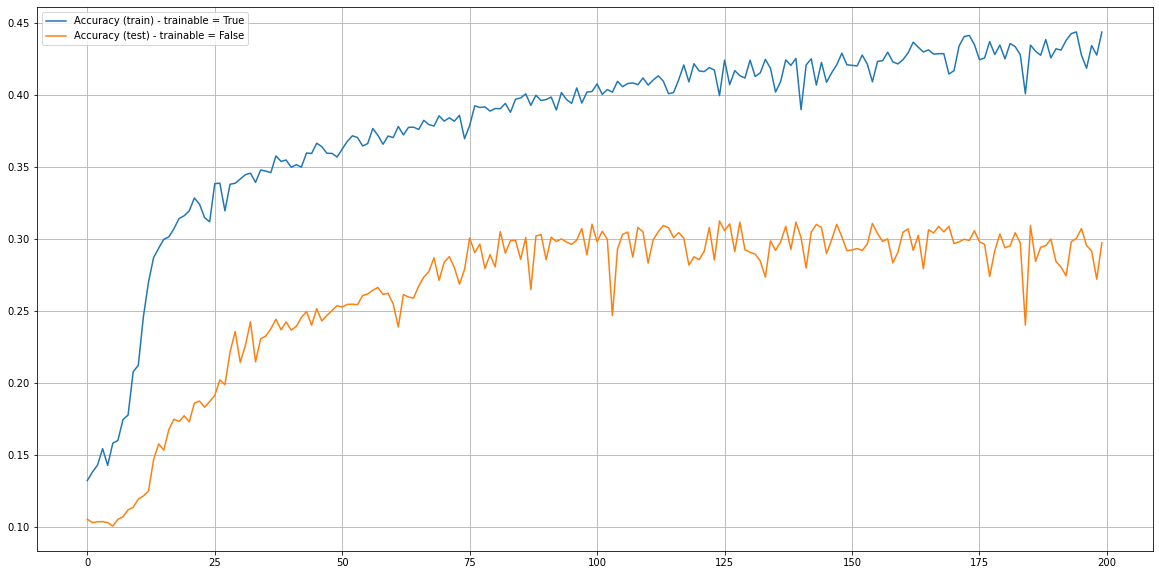

In [17]:
plt.figure(figsize = [20, 10])
plt.plot(history1.history['val_acc'], label = 'Accuracy (train) - trainable = True')
plt.plot(history2.history['val_acc'], label = 'Accuracy (test) - trainable = False')
plt.grid()
plt.legend()
plt.show()

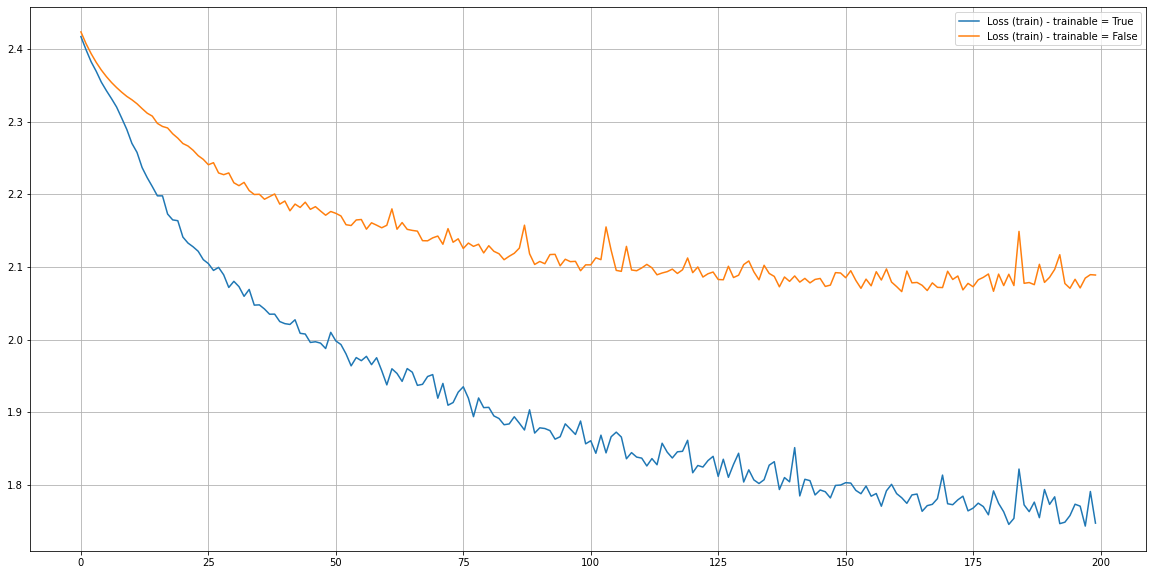

In [19]:
plt.figure(figsize = [20, 10])
plt.plot(history1.history['val_loss'], label = 'Loss (train) - trainable = True')
plt.plot(history2.history['val_loss'], label = 'Loss (train) - trainable = False')
plt.grid()
plt.legend()
plt.show()